In [1]:
import pandas as pd
import numpy as np
from os import listdir
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
from utils.preprocessing import *
from utils.evaluate import *
from utils.models import *

In [2]:
%load_ext autoreload
%autoreload 2

Import

In [3]:
path = "data/"

In [4]:
zf = zipfile.ZipFile(path+'lish-moa.zip') 

In [5]:
df_train_targets_nonscored = pd.read_csv(zf.open('train_targets_nonscored.csv'))
df_train_drug = pd.read_csv(zf.open('train_drug.csv'))
df_test_features = pd.read_csv(zf.open('test_features.csv'))
df_train_targets_scored = pd.read_csv(zf.open('train_targets_scored.csv'))
df_train_features = pd.read_csv(zf.open('train_features.csv'))

First approach and vizu

In [6]:
print("Nb of drug id",len(df_train_drug.drug_id.unique()))
print("Nb of sig id",len(df_train_drug.sig_id.unique()))
print("Nb of obs",df_train_features.shape[0])
print("Nb of variables",df_train_features.shape[1])

Nb of drug id 3289
Nb of sig id 23814
Nb of obs 23814
Nb of variables 876


In [7]:
df_train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [8]:
df_train_targets_scored.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print("X train shape ",df_train_features.shape)
print("Ys train shape ",df_train_targets_scored.shape)

X train shape  (23814, 876)
Ys train shape  (23814, 207)


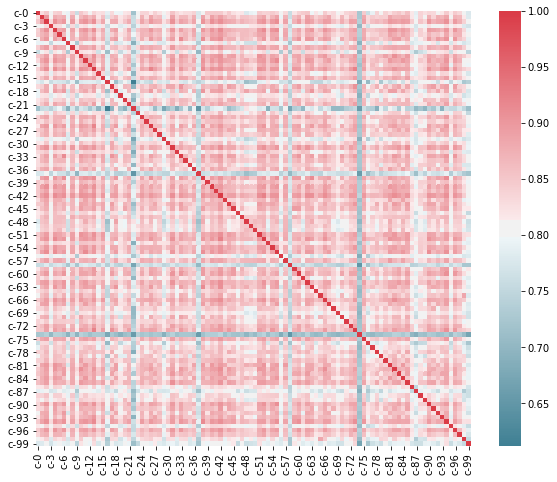

In [10]:
plot_corr_mat_features(df_train_features,'c-',None,'')

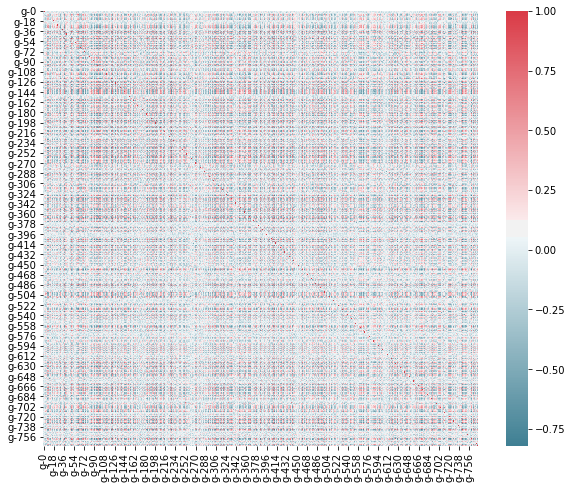

In [10]:
plot_corr_mat_features(df_train_features,'g-',None,'')

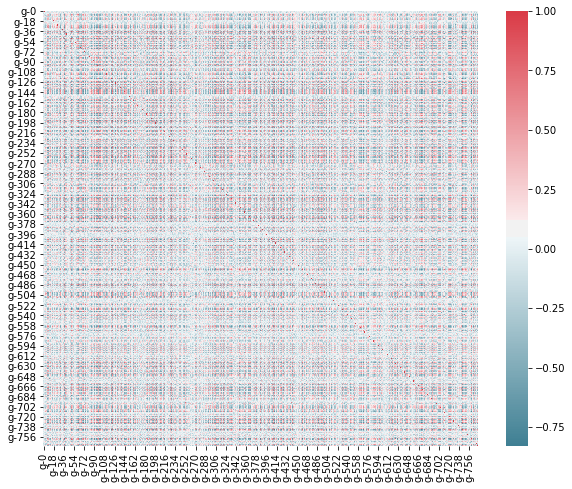

In [11]:
plot_corr_mat_features(df_train_features,'g-','cp_type','trt_cp')

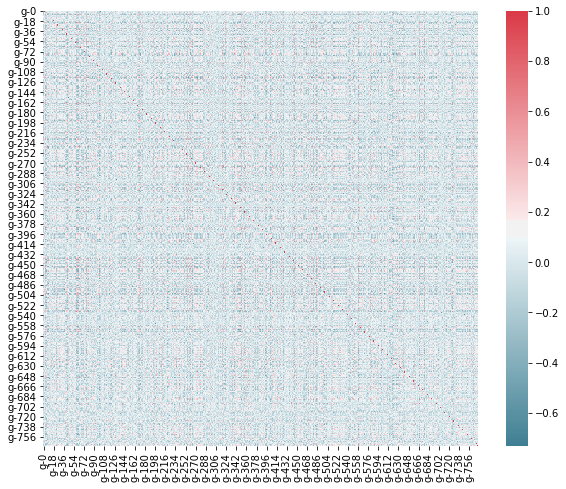

In [12]:
plot_corr_mat_features(df_train_features,'g-','cp_type','ctl_vehicle')

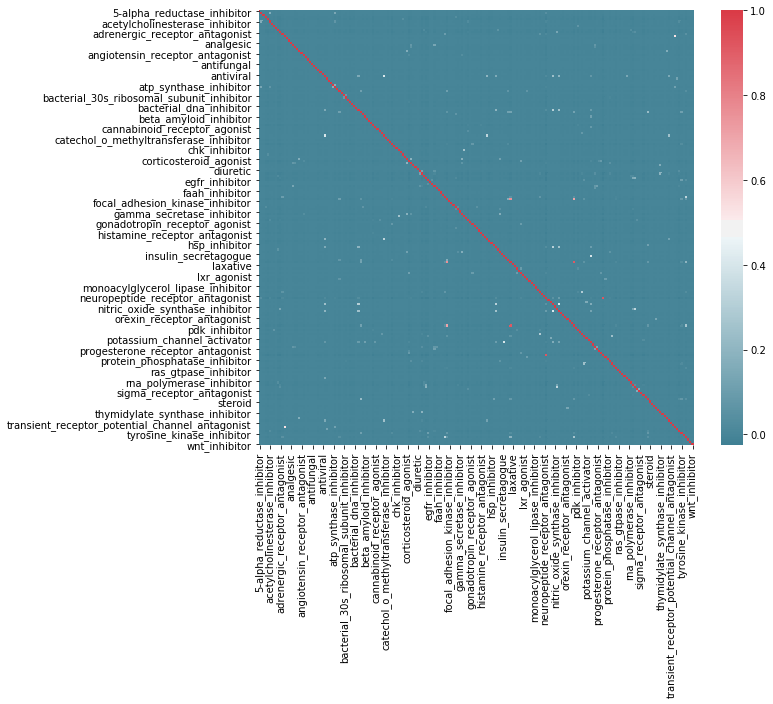

In [13]:
plot_corr_targets(df_train_targets_scored)

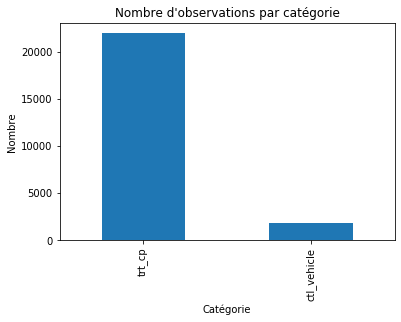

In [14]:
plot_bar(df_train_features,'cp_type')

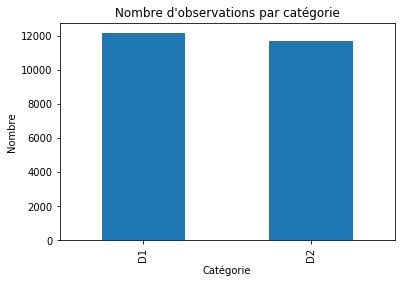

In [15]:
plot_bar(df_train_features,'cp_dose')

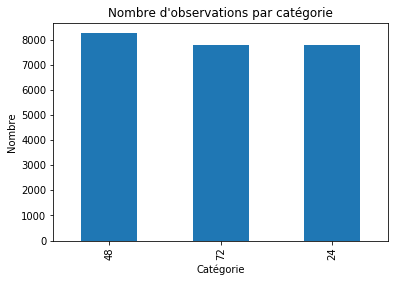

In [16]:
plot_bar(df_train_features,'cp_time')

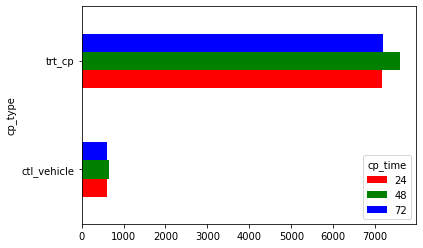

In [17]:
multi_var_bar(df_train_features,'cp_type', 'cp_time')

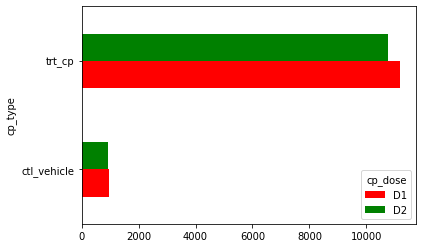

In [18]:
multi_var_bar(df_train_features,'cp_type', 'cp_dose')

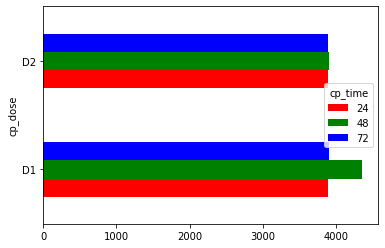

In [19]:
multi_var_bar(df_train_features,'cp_dose', 'cp_time')

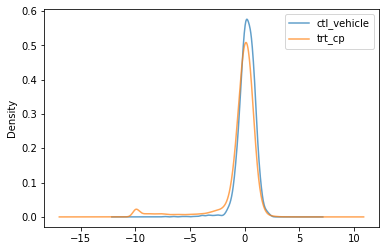

In [20]:
var_density(df_train_features,'c-1','cp_type')

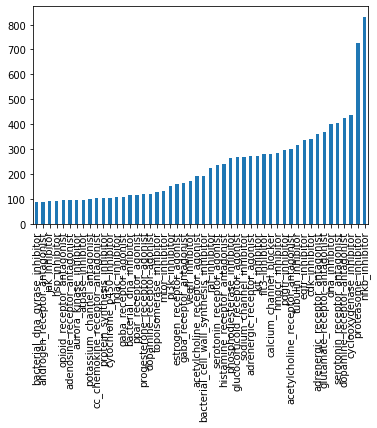

In [21]:
ordered_labels = plot_most_pos_target(df_train_targets_scored,50)

In [22]:
#need to add sig_id because dropped while ordering colums
ordered_labels.append('sig_id')

In [23]:
#get sorted positive rates dict (by column so index if sorted dataframe)
dict_pos_rate = def_positive_rate_per_col(df_train_targets_scored)
dict_pos_rate_sorted = {k: v for k, v in sorted(dict_pos_rate.items(), key=lambda item: item[1])}
sorted_list_pos_rate = sorted(dict_pos_rate_sorted.values(), reverse=True)

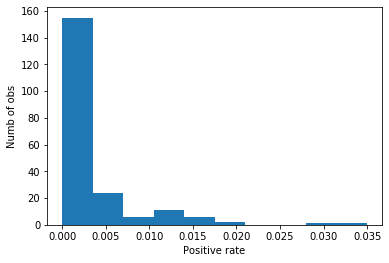

In [24]:
#plot hist of positive rates list
plt.hist(sorted_list_pos_rate)
plt.xlabel('Positive rate')
plt.ylabel('Numb of obs')
plt.show()

In [ ]:
_ = plot_most_pos_target(df_train_targets_nonscored,50)

In [25]:
#We order targets according positive rate
df_train_targets_scored_ordered = df_train_targets_scored[ordered_labels]
df_train_targets_scored_ordered.shape

(23814, 207)

In [26]:
df_train_targets_scored_ordered.head()

,nfkb_inhibitor,proteasome_inhibitor,cyclooxygenase_inhibitor,dopamine_receptor_antagonist,serotonin_receptor_antagonist,dna_inhibitor,glutamate_receptor_antagonist,adrenergic_receptor_antagonist,cdk_inhibitor,egfr_inhibitor,...,atm_kinase_inhibitor,nicotinic_receptor_agonist,retinoid_receptor_antagonist,antiarrhythmic,protein_phosphatase_inhibitor,autotaxin_inhibitor,diuretic,erbb2_inhibitor,atp-sensitive_potassium_channel_antagonist,sig_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,id_000644bb2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,id_000779bfc
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,id_000a6266a
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,id_0015fd391
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,id_001626bd3


Prepro

In [27]:
#Convert matrix
X = prepro_X(df_train_features,df_train_drug)
Y = prepro_Y(df_train_targets_scored_ordered)
print(X.shape,Y.shape)

(23814, 876) (23814, 206)


ML

Test on one column

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest


In [31]:
#select the target (integer for last parameter) or targets (set 'all' for last param)
X_train, X_val, Y_train, Y_val = split_and_select_target(X,Y,1)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(15955, 876) (7859, 876) (15955,) (7859,)


In [32]:
#Simple RF
models_loss = []
clf = RandomForestClassifier(max_depth=400, random_state=2020)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
models_loss.append(log_loss(Y_val, Y_pred))
mean_log_loss(models_loss)

0.030764147188132532

In [33]:
#Bagging classifier
models_loss = []
clf = BaggingClassifier(base_estimator=SVC(), random_state=2020)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
models_loss.append(log_loss(Y_val, Y_pred))
mean_log_loss(models_loss)

0.08350303405772032

In [ ]:
#outlier detection algo
models_loss = []
clf = IsolationForest(n_estimators=200, contamination=sorted_list_pos_rate[1],random_state=2020).fit(X_train)
Y_pred = clf.predict(X_val)
Y_pred[Y_pred == 1] = 0
Y_pred = Y_pred*-1
models_loss.append(log_loss(Y_val, Y_pred))
mean_log_loss(models_loss)

Test over several columns

2 choix : 1) par colonne (target par target) ou 2) on considère le vecteur des targets dans son ensemble

In [ ]:
#select the target (integer for last parameter) or targets (set 'all' for last param)
X_train, X_val, Y_train, Y_val = split_and_select_target(X,Y,'all')
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

In [ ]:
#Idea : for very low positive rate => naive classifier
#for very average positive rate => imbalanced classifier
#for "high" positive rate => classifier

In [ ]:
clf = RandomForestClassifier(max_depth=400, random_state=2020)
naive = NullPredictor(0)

In [ ]:
list_loss = train_over_targets(X,Y,clf,naive,sorted_list_pos_rate)